# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json as json
from numpy.polynomial.polynomial import polyfit

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Open Weather API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

response = requests.get(query_url + city)
response_json = response.json()
print(json.dumps(response_json, indent=4))

{
    "coord": {
        "lon": 25.5701,
        "lat": -33.918
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 63.1,
        "feels_like": 63.39,
        "temp_min": 63.1,
        "temp_max": 63.1,
        "pressure": 1017,
        "humidity": 91,
        "sea_level": 1017,
        "grnd_level": 1012
    },
    "visibility": 10000,
    "wind": {
        "speed": 4.34,
        "deg": 259,
        "gust": 4.65
    },
    "clouds": {
        "all": 45
    },
    "dt": 1666577340,
    "sys": {
        "type": 2,
        "id": 2035063,
        "country": "ZA",
        "sunrise": 1666581938,
        "sunset": 1666629478
    },
    "timezone": 7200,
    "id": 964420,
    "name": "Port Elizabeth",
    "cod": 200
}


In [4]:
# Lists
city_name = []
country = []
date = []
latitude = []
longitude = []
temp = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

# Counter
city_number = 1



# Loop
for city in cities:

# Exception
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"City number {city_number} | {city_record}")
        
        # Next city
        city_number += 1
        
    except:
        print("City not found. Skipping...") 
    continue



City number 1 | Rikitea
City number 2 | Vaini
City number 3 | Albany
City number 4 | George Town
City number 5 | Puerto Ayora
City number 6 | Yulara
City number 7 | Chokurdakh
City number 8 | Bredasdorp
City number 9 | Provideniya
City not found. Skipping...
City not found. Skipping...
City number 10 | Torbay
City number 11 | Kumul
City number 12 | Upernavik
City number 13 | Bethel
City number 14 | Jamestown
City number 15 | Ribeira Grande
City not found. Skipping...
City number 16 | Hervey Bay
City number 17 | Dikson
City number 18 | Carnarvon
City number 19 | Hermanus
City number 20 | Geraldton
City not found. Skipping...
City number 21 | Nipawin
City number 22 | Alofi
City number 23 | Goundam
City number 24 | Lebu
City number 25 | Ilulissat
City number 26 | Severo-Kuril'sk
City number 27 | Cidreira
City number 28 | Yellowknife
City number 29 | Chui
City number 30 | Ushuaia
City number 31 | Torit
City not found. Skipping...
City number 32 | Saint-Philippe
City number 33 | Meulaboh
Ci

City number 276 | Westport
City number 277 | Bilibino
City number 278 | Wuwei
City number 279 | Laas
City not found. Skipping...
City number 280 | Cairns
City number 281 | Trairi
City number 282 | Hay River
City number 283 | Mil'kovo
City number 284 | San Miguel de Cozumel
City number 285 | Nhulunbuy
City number 286 | Palmer
City number 287 | Baghdad
City number 288 | Sola
City number 289 | Mackay
City number 290 | Cayenne
City number 291 | Huntsville
City number 292 | Verkhoyansk
City number 293 | Maracaçumé
City number 294 | São Félix do Xingu
City number 295 | Atasū
City number 296 | Quryq
City number 297 | Taoudenni
City number 298 | Rome
City not found. Skipping...
City number 299 | Jām Sāhib
City number 300 | Anchorage
City number 301 | Port Hardy
City number 302 | Nemuro
City number 303 | Ancud
City number 304 | Bilma
City number 305 | Narsaq
City number 306 | Mumford
City number 307 | Ciudad Bolivar
City not found. Skipping...
City number 308 | Grindavik
City number 309 | Plett

City number 542 | San Fernando del Valle de Catamarca
City number 543 | Camapuã
City number 544 | Saint-Joseph
City number 545 | Council Bluffs
City number 546 | Kungurtug
City number 547 | Balatonszárszó
City number 548 | Kavaratti
City number 549 | Nara
City number 550 | Yurgamysh
City not found. Skipping...
City number 551 | Koumac
City number 552 | Malaya Serdoba
City number 553 | Dukat
City not found. Skipping...
City number 554 | Leku
City number 555 | Camaná
City number 556 | Kitob
City number 557 | Yangambi
City not found. Skipping...
City number 558 | Isangel
City number 559 | Severnoye
City number 560 | Ayan
City number 561 | Celestún
City number 562 | Wilmington Island


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_data = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Temperature": temp,
    "Max Temp" : max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_df = pd.DataFrame(weather_data)
weather_df.count()

City           562
Country        562
Date           562
Latitude       562
Longitude      562
Temperature    562
Max Temp       562
Humidity       562
Cloudiness     562
Wind Speed     562
dtype: int64

In [8]:
weather_df.head()

,City,Country,Date,Latitude,Longitude,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,1666577219,-23.1203,-134.9692,73.11,73.11,82,76,12.41
1,Vaini,TO,1666577210,-21.2000,-175.2000,77.16,77.16,65,20,14.97
2,Albany,US,1666577106,42.6001,-73.9662,50.67,52.54,82,100,1.92
3,George Town,MY,1666577209,5.4112,100.3354,82.53,84.13,78,20,0.00
4,Puerto Ayora,EC,1666577321,-0.7393,-90.3518,66.54,66.54,87,82,5.99


In [9]:
weather_df.to_csv("weather_df.csv")


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
humid=weather_df.loc[weather_df['Humidity'] > 100]
humid

# NO CITIES WITH HUMIDITY OVER 100%

,City,Country,Date,Latitude,Longitude,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed


In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

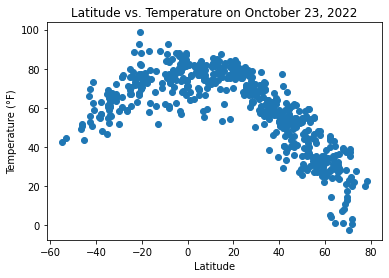

In [13]:
# Create scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Temperature"])

# Labels
plt.title("Latitude vs. Temperature on Onctober 23, 2022")
plt.ylabel("Temperature (°F)")
plt.xlabel("Latitude")

# Save
plt.savefig("Latitude_Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

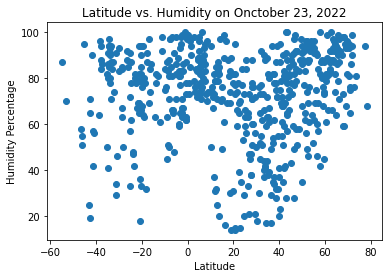

In [14]:
# Create scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Humidity"])

# Labels
plt.title("Latitude vs. Humidity on Onctober 23, 2022")
plt.ylabel("Humidity Percentage")
plt.xlabel("Latitude")

# Save
plt.savefig("Latitude_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

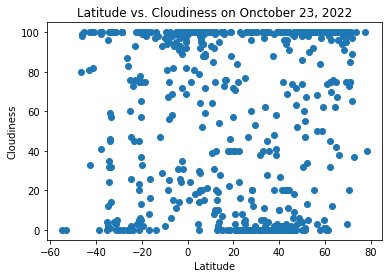

In [15]:
# Create scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"])

# Labels
plt.title("Latitude vs. Cloudiness on Onctober 23, 2022")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Save
plt.savefig("Latitude_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

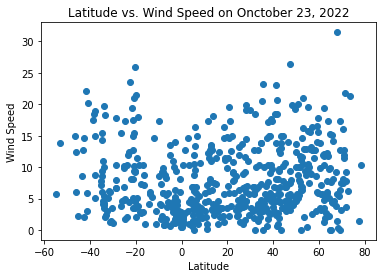

In [16]:
# Create scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"])

# Labels
plt.title("Latitude vs. Wind Speed on Onctober 23, 2022")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Save
plt.savefig("Latitude_Wind_Speed.png")
plt.show()

## Linear Regression

In [17]:
northern_df = weather_df.loc[weather_df["Latitude"] >= 0]
southern_df = weather_df.loc[weather_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

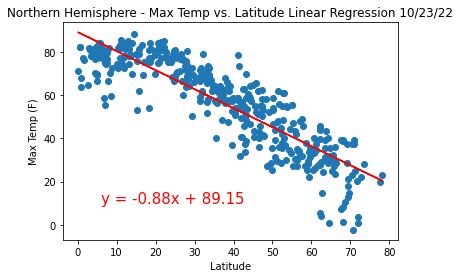

<Figure size 432x288 with 0 Axes>

In [35]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression 10/23/22')

plt.show()

plt.savefig("Northern_Max_Temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

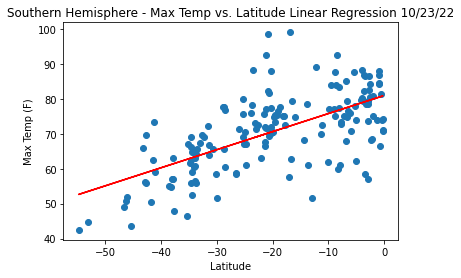

<Figure size 432x288 with 0 Axes>

In [36]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression 10/23/22')

plt.show()

plt.savefig("Southern_Max_Temp.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

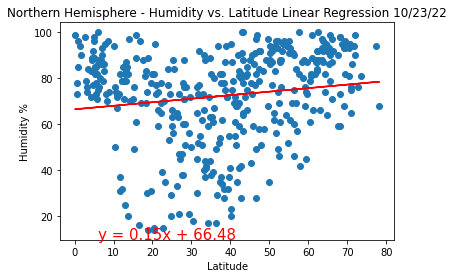

<Figure size 432x288 with 0 Axes>

In [37]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression 10/23/22')

plt.show()

plt.savefig("Northern_Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

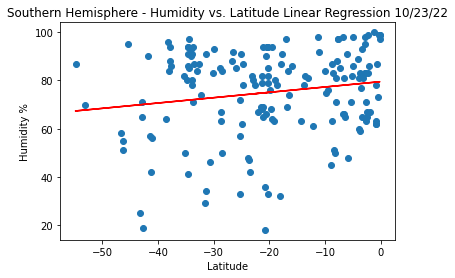

<Figure size 432x288 with 0 Axes>

In [38]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression 10/23/22')

plt.show()

plt.savefig("Southern_Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

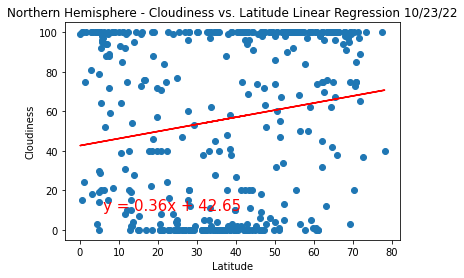

<Figure size 432x288 with 0 Axes>

In [39]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression 10/23/22')

plt.show()

plt.savefig("Northern_Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

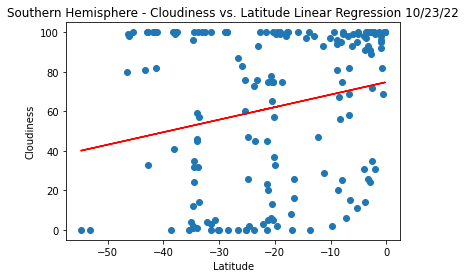

<Figure size 432x288 with 0 Axes>

In [41]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression 10/23/22')

plt.show()

plt.savefig("Southern_Cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

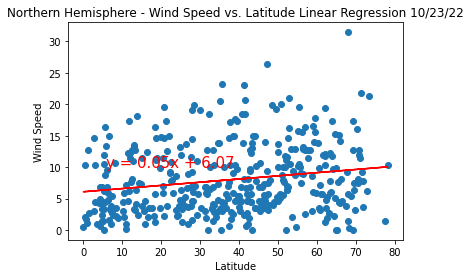

<Figure size 432x288 with 0 Axes>

In [44]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression 10/23/22')

plt.show()

plt.savefig("Northern_Wind_Speed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

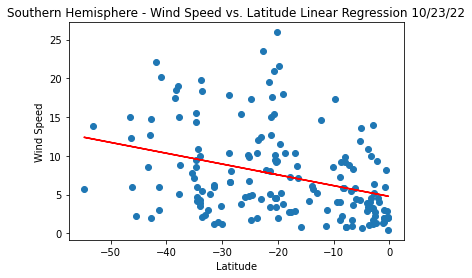

<Figure size 432x288 with 0 Axes>

In [45]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression 10/23/22')

plt.show()

plt.savefig("Southern_Wind_Speed.png")